In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import zero_one_loss

from utils.concentrations import pm_bernstein_lower_limit, pm_bernstein_upper_limit, betting_cs_lower_limit

%matplotlib inline

In [2]:
sns.set(
    style="whitegrid",
    font_scale=1.4,
    rc={
        "lines.linewidth": 2,
        #             "axes.facecolor": ".9",
        'figure.figsize': (12, 6)
    })
sns.set_palette('Set2')
matplotlib.rcParams['text.usetex'] = True

# 

In [6]:
mean_inner = np.array([0,0])
cov_inner = np.eye(2)

In [87]:
sample_inner = np.random.multivariate_normal(mean=mean_inner, cov = cov_inner/36 , size=600)

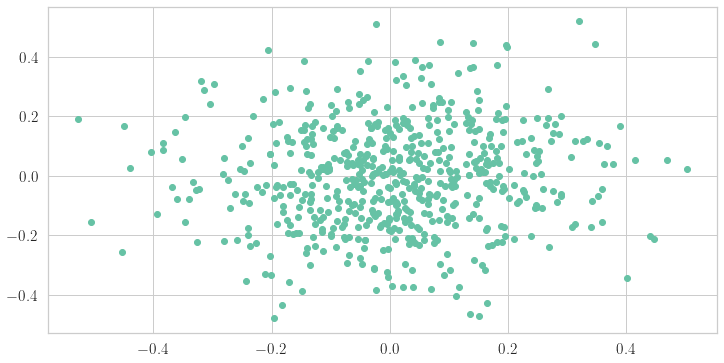

In [88]:
plt.scatter(sample_inner[:,0],sample_inner[:,1])

In [90]:
n_source = 200
n_target = 200

In [153]:
angles_target = 2*np.pi*np.random.uniform(size=100)
x_angle_target = np.cos(angles_target)
y_angle_target = np.sin(angles_target)

In [156]:
angles_source = 2*np.pi/3*(np.random.uniform(size=100)-1/2)
x_angle_source = np.cos(angles_source)
y_angle_source = np.sin(angles_source)

In [164]:
def sample_cov_shift_data(n_pts, domain_type='source'):
    sample = np.zeros([n_pts, 2])
    labels = np.random.binomial(n=1, p=1 / 2, size=n_pts)
    n_outer = sum(labels)
    sample_inner = np.random.multivariate_normal(mean=mean_inner,
                                                 cov=cov_inner / 36,
                                                 size=n_pts - n_outer)
    if domain_type == 'source':
        angles = 2*np.pi/3 * (np.random.uniform(size=n_outer) - 1 / 2)
    elif domain_type == 'target':
        angles = 2 * np.pi * np.random.uniform(size=n_outer)
    x_angle = np.cos(angles)
    y_angle = np.sin(angles)
    mean_outer = np.array([cur_pair for cur_pair in zip(x_angle, y_angle)])
    sample_outer = np.vstack([
        np.random.multivariate_normal(mean=cur_mean,
                                      cov=cov_inner / 36,
                                      size=1) for cur_mean in mean_outer
    ])
    sample[labels == 0] = sample_inner
    sample[labels == 1] = sample_outer
    
    labels = (sample[:,0]**2+sample[:,1]**2>=0.5).astype('int')
    
    return sample, labels

In [91]:
np.random.binomial(n=1,p=1/2,size=n_source)

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1])

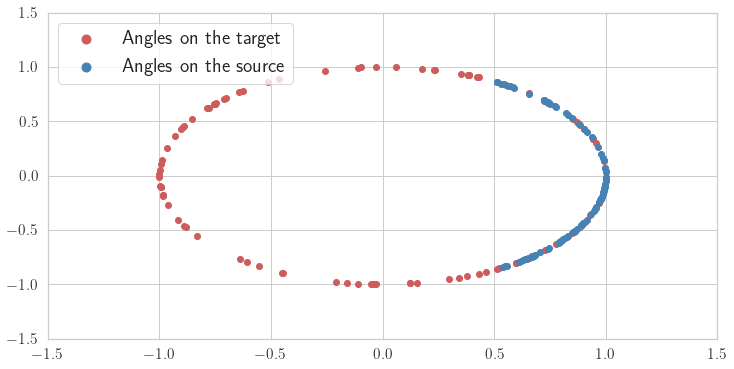

In [157]:
plt.scatter(x_angle,y_angle, c = 'indianred', label = 'Angles on the target')
plt.scatter(x_angle_source,y_angle_source, c= 'steelblue', label = 'Angles on the source')
# plt.ylabel('LCB value', fontsize=23)
# plt.xlabel('Sample size', fontsize=23)

plt.legend(loc=2, markerscale=1.5, prop={'size': 20})

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

plt.savefig('img/cov_shift_angles.pdf', bbox_inches='tight')

In [82]:
mean_outer_source = np.array(
    [cur_pair for cur_pair in zip(x_angle_source, y_angle_source)])
sample_outer_source = np.vstack([
    np.random.multivariate_normal(mean=cur_mean, cov=cov_inner / 100, size=1)
    for cur_mean in mean_outer_source
])



mean_outer_target = np.array(
    [cur_pair for cur_pair in zip(x_angle_target, y_angle_target)])

sample_outer_target = np.vstack([
    np.random.multivariate_normal(mean=cur_mean, cov=cov_inner / 100, size=1)
    for cur_mean in mean_outer_target
])

In [37]:
np.vstack(sample_outer_source)

array([[ 2.92518640e-01, -4.94700513e-01],
       [ 1.75643034e+00, -1.19750040e+00],
       [-2.76139112e-02, -1.06640949e+00],
       [ 7.88662024e-01,  8.25885234e-01],
       [ 5.90442569e-01, -1.27882388e+00],
       [ 8.27998138e-01, -7.67825866e-02],
       [-1.13021868e-01, -6.92782261e-01],
       [ 7.64649484e-01, -1.33765657e+00],
       [ 9.36139070e-01, -1.70654436e+00],
       [-4.40283352e-02, -2.22673816e-01],
       [-5.55483250e-02,  1.02145181e+00],
       [ 9.62683566e-01,  4.10025379e-01],
       [-3.93942042e-01, -1.97139845e-01],
       [ 1.56557003e+00,  8.89826177e-01],
       [ 5.45548983e-01,  1.26044439e+00],
       [ 1.28843261e+00,  7.60436653e-01],
       [ 8.66070357e-01,  3.17018777e-01],
       [ 1.45031800e+00,  6.79836472e-01],
       [ 1.45495563e+00, -1.10773762e+00],
       [ 7.24438849e-01, -5.23241299e-01],
       [ 3.75438053e-01, -1.49679147e+00],
       [ 5.19599444e-01,  6.05777727e-01],
       [ 1.17879536e+00,  1.61015993e+00],
       [ 1.

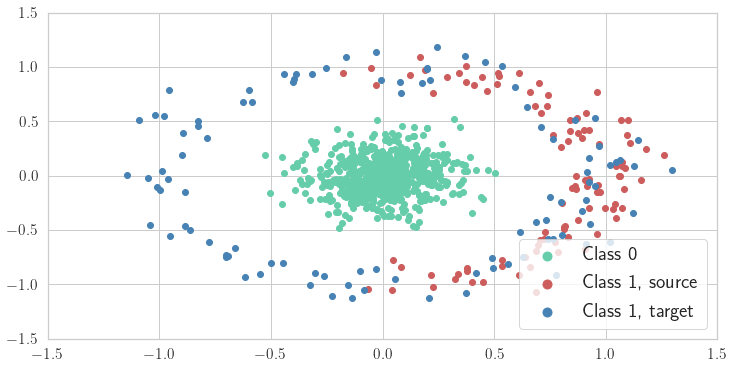

In [89]:
plt.scatter(sample_inner[:,0],sample_inner[:,1], label='Class 0', c = 'mediumaquamarine')
plt.scatter(sample_outer_source[:,0], sample_outer_source[:,1], label='Class 1, source', c = 'indianred')

plt.scatter(sample_outer_target[:,0], sample_outer_target[:,1], label='Class 1, target', c = 'steelblue')

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

plt.legend(loc=4, markerscale=1.5, prop={'size': 20})

In [162]:
n_source=400
n_target=400

In [165]:
x_source, y_source = sample_cov_shift_data(n_source, domain_type='source')
x_target, y_target = sample_cov_shift_data(n_target, domain_type='target')

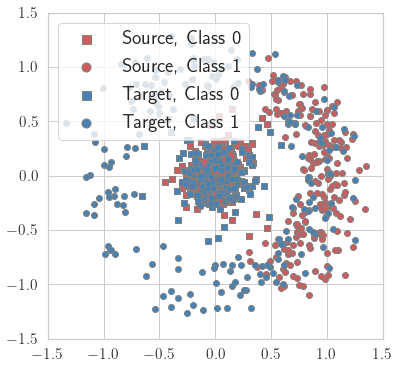

In [207]:
# plt.scatter(sample_inner[:,0],sample_inner[:,1], label='Class 0', c = 'mediumaquamarine')
plt.figure(figsize=(6,6))
plt.scatter(x_source[y_source == 0, 0],
            x_source[y_source == 0, 1],
            marker='s',
            edgecolor="gray",
            label='Source, Class 0',
            c='indianred')
plt.scatter(x_source[y_source == 1, 0],
            x_source[y_source == 1, 1],
            label='Source, Class 1',
            edgecolor="gray",
            c='indianred')

plt.scatter(x_target[y_target == 0, 0],
            x_target[y_target == 0, 1],
            label='Target, Class 0',
            marker='s',
            edgecolor="gray",
            c='steelblue')
plt.scatter(x_target[y_target == 1, 0],
            x_target[y_target == 1, 1],
            label='Target, Class 1',
            edgecolor="gray",
            c='steelblue')

# plt.scatter(sample_outer_target[:,0], sample_outer_target[:,1], label='Class 1, target', c = 'steelblue')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.legend(loc=2, markerscale=1.5, prop={'size': 20})

plt.savefig('img/cov_shift_data.pdf', bbox_inches='tight')

# Train logistic regression

In [167]:
from sklearn.linear_model import LogisticRegression


In [169]:
clf = LogisticRegression()

In [170]:
n_s_train = 200
n_s_test = 400

In [171]:
x_source_train, y_source_train = sample_cov_shift_data(n_s_train, domain_type='source')
x_source_test, y_source_test = sample_cov_shift_data(n_s_test, domain_type='source')

In [173]:
clf.fit(x_source_train,y_source_train)

LogisticRegression()

In [174]:
clf.score(x_source_test, y_source_test)

0.975

In [191]:
xx, yy = np.mgrid[-1.5:1.5:.01, -1.5:1.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

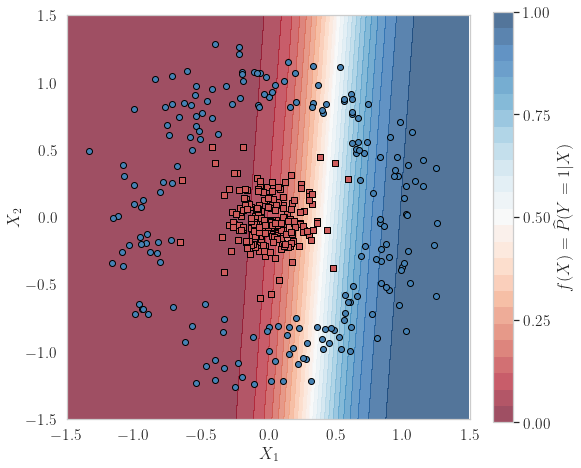

In [206]:
f, ax = plt.subplots(figsize=(8,8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1, alpha=0.7)
ax_c = f.colorbar(contour, fraction=0.046, pad=0.05)
ax_c.set_label("$f(X) = \widehat{P}(Y = 1 | X )$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
#            cmap="RdBu", vmin=-.2, vmax=1.2,
#            edgecolor="white", linewidth=1)

plt.scatter(x_target[y_target == 0, 0],
            x_target[y_target == 0, 1],
            label='Target, Class 0',
            marker='s',
            edgecolor="black",
            c='indianred')
plt.scatter(x_target[y_target == 1, 0],
            x_target[y_target == 1, 1],
            label='Target, Class 1',
            edgecolor="black",
            c='steelblue')

ax.set(aspect="equal",
       xlim=(-1.5, 1.5), ylim=(-1.5, 1.5),
       xlabel="$X_1$", ylabel="$X_2$")

ax.grid(False)

plt.savefig('img/logistic_cov_shift.pdf',bbox_inches='tight')

# Running framework

In [208]:
from utils.tests import Drop_tester,misclas_losses

In [209]:
eps_tol = 0.1

In [257]:
tester_conj_bernstein = Drop_tester()

tester_conj_bernstein.eps_tol = eps_tol
tester_conj_bernstein.target_conc_type = 'conj-bern'



In [258]:
conj_bern_target_lower_bounds = list()
conj_bern_source_upper_bounds = list()

In [259]:
size_of_batch = 25
num_of_batches_to_sample = 40
num_of_repeats = 100

In [260]:
for cur_sim in range(num_of_repeats):
    conj_bern_target_lower_bounds+=[[]]
    
    x_source_train, y_source_train = sample_cov_shift_data(n_s_train, domain_type='source')
    
    clf.fit(x_source_train,y_source_train)
    
    x_source_val, y_source_val = sample_cov_shift_data(100, domain_type='source')

    y_pred_val = clf.predict(x_source_val)
    ind_loss_source = misclas_losses(y_pred_val, y_source_val)

    tester_conj_bernstein.estimate_risk_source(ind_loss_source)

    conj_bern_source_upper_bounds += [
        tester_conj_bernstein.source_rejection_threshold
    ]

    X_target = []
    y_target = []

    for i in range(num_of_batches_to_sample):
        x_source_target, y_source_target = sample_cov_shift_data(size_of_batch, domain_type='target')

        X_target += [x_source_target]
        y_target += [y_source_target]

    X_target = np.vstack(X_target)
    y_target = np.hstack(y_target)

    y_pred_target = clf.predict(X_target)
    ind_loss_target = misclas_losses(y_pred_target, y_target)

    for cur_batch in range(num_of_batches_to_sample):
        cur_losses = ind_loss_target[0:(cur_batch + 1) * size_of_batch]
        tester_conj_bernstein.estimate_risk_target(cur_losses)
        conj_bern_target_lower_bounds[cur_sim] += [
            tester_conj_bernstein.target_risk_lower_bound
        ]

In [261]:
sample_sizes = np.arange(size_of_batch,size_of_batch*(num_of_batches_to_sample+1), step=size_of_batch)

In [262]:
sample_sizes

array([  25,   50,   75,  100,  125,  150,  175,  200,  225,  250,  275,
        300,  325,  350,  375,  400,  425,  450,  475,  500,  525,  550,
        575,  600,  625,  650,  675,  700,  725,  750,  775,  800,  825,
        850,  875,  900,  925,  950,  975, 1000])

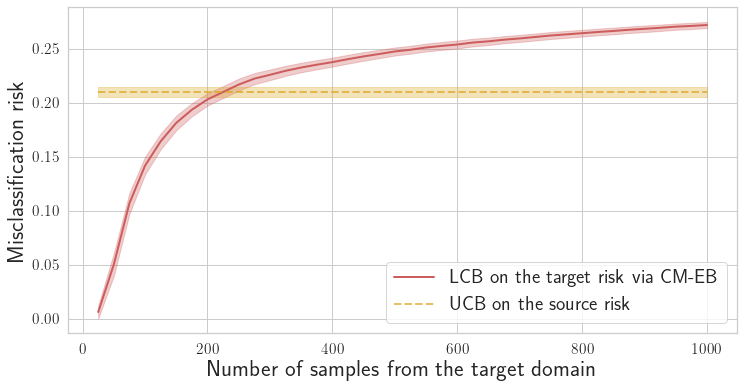

In [263]:
l1, = plt.plot(sample_sizes,np.mean(conj_bern_target_lower_bounds, axis=0),
               color='indianred')


plt.fill_between(
    sample_sizes,
    y1=np.mean(conj_bern_target_lower_bounds, axis=0) -
    2 * np.std(conj_bern_target_lower_bounds, axis=0) / np.sqrt(num_of_repeats),
    y2=np.mean(conj_bern_target_lower_bounds, axis=0) +
    2 * np.std(conj_bern_target_lower_bounds, axis=0) / np.sqrt(num_of_repeats),
    alpha=0.3,
    color='indianred')

l2, = plt.plot(sample_sizes,
               np.repeat(np.mean(conj_bern_source_upper_bounds, axis=0),num_of_batches_to_sample
                         ),
               linestyle='dashed',
               color='goldenrod',
               alpha=0.7)

plt.fill_between(
    sample_sizes,
    y1=np.mean(conj_bern_source_upper_bounds, axis=0) - 2 *
    np.std(conj_bern_source_upper_bounds, axis=0) / np.sqrt(num_of_repeats),
    y2=np.mean(conj_bern_source_upper_bounds, axis=0) +
    2 * np.std(conj_bern_source_upper_bounds, axis=0) / np.sqrt(num_of_repeats),
    alpha=0.3,
    color='goldenrod')

categories = [
     'LCB on the target risk via CM-EB','UCB on the source risk'
]

leg4 = plt.legend([l1, l2],
                  categories,
                  loc=4,
                  ncol=1,
                  prop={'size': 20})  # Two columns, horizontal group labels

plt.ylabel('Misclassification risk', fontsize=23)
plt.xlabel('Number of samples from the target domain', fontsize=23)
plt.savefig('img/framework_cov_shift.pdf', bbox_inches='tight')

In [252]:
x_source_val, y_source_val = sample_cov_shift_data(100, domain_type='source')
clf.score(x_source_val, y_source_val)

0.96